### 构造预测模型

In [3]:
from sklearn.svm import SVC
# linear即代表着不适用核函数
svm = SVC(C=1.0, kernel='linear', random_state=0)

### 加载数据,训练模型
sklearn中自置了一些实例数据，可以直接使用，比如我们之前使用的鸢尾花。

In [11]:
from sklearn import datasets
# features: petal length, petal width, sepal length, sepal width and species
# 这里我们只取前两个特征作为特征训练
datas = datasets.load_iris()
X = datas.data[:,[1,2]]
y = datas.target
svm.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

### 预测

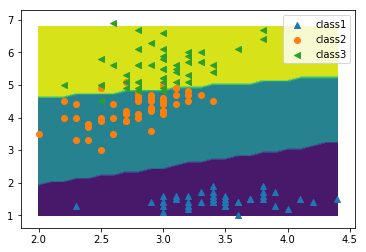

In [21]:
from matplotlib import pyplot as plt
import numpy as np 

x0_min, x0_max = X[:, 0].min(),X[:, 0].max()
x1_min, x1_max = X[:, 1].min(),X[:, 1].max()

interval = 0.1 
xy, yx = np.meshgrid(np.arange(x0_min, x0_max, interval),
                    np.arange(x1_min, x1_max,interval))

z = np.array([xy.ravel(), yx.ravel()]).T

# 预测
z_predict = []
for _z in z:
    z_predict.append(svm.predict(_z.reshape(1,-1)))
    
z_predict = np.array(z_predict).reshape(xy.shape)
# 绘制结果
ax = plt.axes()
ax.contourf(xy, yx, z_predict)
# 绘制原始数据
ax.scatter(X[y == 0,0], X[y == 0,1], marker='^', label='class1')
ax.scatter(X[y == 1,0], X[y == 1,1], marker='o', label='class2')
ax.scatter(X[y == 2,0], X[y == 2,1], marker='<', label='class3')
ax.legend()

### 核函数在支持向量机中的引用
核函数主要是用来解决非线性问题，有点像我们在**3-3正则化**中构造的多项式，但是不是通过构造多项式来实现的，核函数相比于多项式来说，主要是将现有数据映射到一个使样本线性可分的高纬度的空间中。  
常用的核函数有：
1. 线性核函数，实际上就是不采用核函数
2. 高斯核函数

#### 构造数据

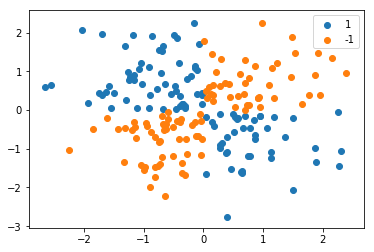

In [33]:
# 我们构造一个“异或”数据集
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(0)

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, -1)  # 得到的这异或结果就是由X_xor的两列数据进行异或运算得到的

plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], label='-1')
plt.legend()

可以看到这次的数据是线性可分的，我们使用scikit提供的svm包来进行分类

In [83]:
from sklearn.svm import SVC
# linear即代表着不适用核函数
svm = SVC(C=10.0, kernel='rbf', random_state=0, gamma=0.1)
svm.fit(X_xor, y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

#### 预测

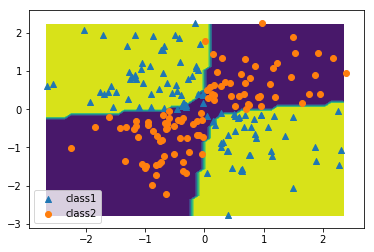

In [84]:
from matplotlib import pyplot as plt
import numpy as np 

x0_min, x0_max = X_xor[:, 0].min(),X_xor[:, 0].max()
x1_min, x1_max = X_xor[:, 1].min(),X_xor[:, 1].max()

interval = 0.1 
xy, yx = np.meshgrid(np.arange(x0_min, x0_max, interval),
                    np.arange(x1_min, x1_max,interval))

z = np.array([xy.ravel(), yx.ravel()]).T

# 预测
z_predict = []
for _z in z:
    z_predict.append(svm.predict(_z.reshape(1,-1)))
    
z_predict = np.array(z_predict).reshape(xy.shape)
# 绘制结果
ax = plt.axes()
ax.contourf(xy, yx, z_predict)
# 绘制原始数据
ax.scatter(X_xor[y_xor==1,0], X_xor[y_xor==1,1], marker='^', label='class1')
ax.scatter(X_xor[y_xor==-1,0], X_xor[y_xor==-1,1], marker='o', label='class2')
ax.legend()

#### 对C和gamma的理解

$C$：在**3-3正则化**中我们提到过$\lambda$,他是正则项的强弱，在svm中，我们通常用$C=\frac{1}{\lambda}$来表示，此时式子就变成了：
$$
$$
我们可以看出此时$C$则是表示对模型的精细化程度，C越大，代表模型权重越高，模型越准。

gamma：他是高斯核函数的一个参数，可以理解为他是从一类数据到另一类数据平滑的程度，gamma越大，平滑越陡峭，gamma越小，这种过度也越平缓，我们把上面例子的gamma调大，看一下效果

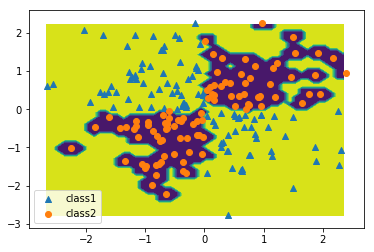

In [87]:
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np 
# linear即代表着不适用核函数
svm = SVC(C=10.0, kernel='rbf', random_state=0, gamma=100)
svm.fit(X_xor, y_xor)

x0_min, x0_max = X_xor[:, 0].min(),X_xor[:, 0].max()
x1_min, x1_max = X_xor[:, 1].min(),X_xor[:, 1].max()

interval = 0.1 
xy, yx = np.meshgrid(np.arange(x0_min, x0_max, interval),
                    np.arange(x1_min, x1_max,interval))

z = np.array([xy.ravel(), yx.ravel()]).T

# 预测
z_predict = []
for _z in z:
    z_predict.append(svm.predict(_z.reshape(1,-1)))
    
z_predict = np.array(z_predict).reshape(xy.shape)
# 绘制结果
ax = plt.axes()
ax.contourf(xy, yx, z_predict)
# 绘制原始数据
ax.scatter(X_xor[y_xor==1,0], X_xor[y_xor==1,1], marker='^', label='class1')
ax.scatter(X_xor[y_xor==-1,0], X_xor[y_xor==-1,1], marker='o', label='class2')
ax.legend()

可以看到，当gamma调大后，使得这两类数据（-1和1）的更紧凑了，但是这样对于未知数据的分类可能会有较大的误差，可以理解为这是一种**过拟合**现象。